## 1. colors 클래스 선언 (20개의 HEX)

In [18]:
class Colors:
    # color palette
    def __init__(self):
        hex = (
            "FF3838",
            "2C99A8",
            "FF701F",
            "6473FF",
            "CFD231",
            "48F90A",
            "92CC17",
            "3DDB86",
            "1A9334",
            "00D4BB",
            "FF9D97",
            "00C2FF",
            "344593",
            "FFB21D",
            "0018EC",
            "8438FF",
            "520085",
            "CB38FF",
            "FF95C8",
            "FF37C7",
        )
        self.palette = [self.hex2rgb("#" + c) for c in hex]
        self.n = len(self.palette)

    def __call__(self, i, bgr=False):
        c = self.palette[int(i) % self.n]
        return (c[2], c[1], c[0]) if bgr else c

    @staticmethod
    def hex2rgb(h):  # rgb order
        return tuple(int(h[1 + i : 1 + i + 2], 16) for i in (0, 2, 4))

## 2. VOC Class names

In [19]:
# VOC class names
classes = [
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "pottedplant",
    "sheep",
    "sofa",
    "train",
    "tvmonitor"
]

## 3. Visualize YOLO

In [22]:
import torch
import os
from os.path import join as osp
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
import albumentations as A
import random
import cv2
import matplotlib.pyplot as plt

csv_file = 'voc-yolo/train.csv'
img_dir = 'voc-yolo/images/'
label_dir = 'voc-yolo/labels/'

annotations = pd.read_csv(csv_file)

def draw_image():
    index = random.randint(0,len(annotations))
    label_path = osp(label_dir, annotations.iloc[index, 1])
    boxes = []
    with open(label_path) as f:
        for label in f.readlines():
            class_label, x, y, width, height = [
                float(x) if float(x) != int(float(x)) else int(x)
                for x in label.replace("\n", "").split()
            ]
            boxes.append([class_label, x, y, width, height])
            
    img_path = osp(img_dir, annotations.iloc[index, 0])
    img = cv2.imread(img_path)
    
    img_h, img_w = img.shape[:2]
    colors = Colors()
    
    for box in boxes:
        x_center, y_center, w, h = box[1:]
        x_min = int((x_center - w/2) * img_w)
        y_min = int((y_center - h/2) * img_h)
        x_max = int((x_center + w/2) * img_w)
        y_max = int((y_center + h/2) * img_h)

        # set rect_th for boxes
        rect_th = max(round(sum(img.shape) / 2 * 0.001), 1)
        # set text_th for category names
        text_th = max(rect_th - 1, 1)
        # set text_size for category names
        text_size = rect_th / 3

        color = colors(int(box[0]))
        cv2.rectangle(img,  
                    (x_min, y_min),
                    (x_max, y_max), 
                    color=color,
                    thickness=rect_th)
        
        p1, p2 = (int(x_min), int(y_min)), (int(x_max), int(y_max))
        label = f"{classes[int(box[0])]}"
        w, h = cv2.getTextSize(label, 0, fontScale=text_size, thickness=text_th)[0]  # label width, height
        outside = p1[1] - h - 3 >= 0  # label fits outside box
        p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
        
        cv2.rectangle(img, p1, p2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(
            img,
            label,
            (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
            0,
            text_size,
            (255, 255, 255),
            thickness=text_th,
        )
        
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

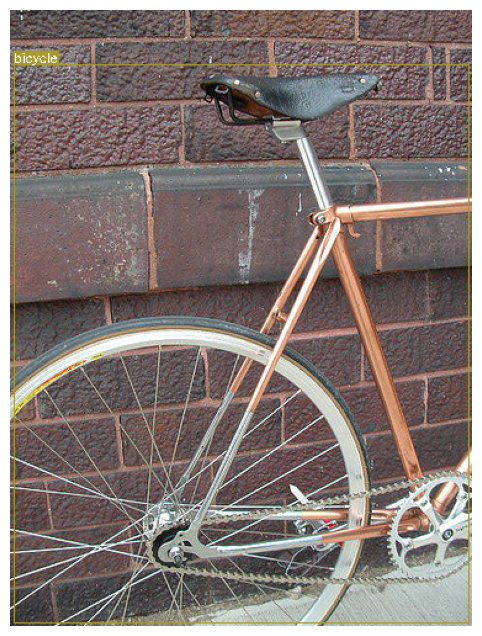

: 

In [26]:
canvas = draw_image()
plt.figure(figsize=(8,8))
plt.imshow(canvas)
plt.axis('off')
plt.show()